In [1]:
import pandas as pd
import geopandas as gpd

In [8]:
!pip install descartes



In [62]:
df = gpd.read_file("topojson/bgd_admbnda_adm2_bbs_20180410.1.json").set_index("ADM2_EN")
df.head()

,id,Shape_Leng,Shape_Area,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry
ADM2_EN,,,,,,,,,,,,,,,
Bagerhat,None,12.929816,0.319709,4001,,,,Khulna,40,Bangladesh,BD,2015-01-01T00:00:00,2018-04-10T00:00:00,1899-11-30T00:00:00,"MULTIPOLYGON (((89.84020 21.82785, 89.84216 21..."
Bandarban,None,5.358126,0.401359,2003,,,,Chittagong,20,Bangladesh,BD,2015-01-01T00:00:00,2018-04-10T00:00:00,1899-11-30T00:00:00,"POLYGON ((92.61390 21.85190, 92.61406 21.84875..."
Barguna,None,4.167970,0.117801,1004,,,,Barisal,10,Bangladesh,BD,2015-01-01T00:00:00,2018-04-10T00:00:00,1899-11-30T00:00:00,"MULTIPOLYGON (((89.87969 22.07870, 89.87865 22..."
Barisal,None,7.713625,0.195228,1006,,,,Barisal,10,Bangladesh,BD,2015-01-01T00:00:00,2018-04-10T00:00:00,1899-11-30T00:00:00,"MULTIPOLYGON (((90.55433 22.59263, 90.54678 22..."
Bhola,None,10.091155,0.170812,1009,,,,Barisal,10,Bangladesh,BD,2015-01-01T00:00:00,2018-04-10T00:00:00,1899-11-30T00:00:00,"MULTIPOLYGON (((90.77174 21.85595, 90.76920 21..."


In [64]:
df_geo = df[['ADM1_EN', 'geometry']]
df_geo.head()

,ADM1_EN,geometry
ADM2_EN,,
Bagerhat,Khulna,"MULTIPOLYGON (((89.84020 21.82785, 89.84216 21..."
Bandarban,Chittagong,"POLYGON ((92.61390 21.85190, 92.61406 21.84875..."
Barguna,Barisal,"MULTIPOLYGON (((89.87969 22.07870, 89.87865 22..."
Barisal,Barisal,"MULTIPOLYGON (((90.55433 22.59263, 90.54678 22..."
Bhola,Barisal,"MULTIPOLYGON (((90.77174 21.85595, 90.76920 21..."


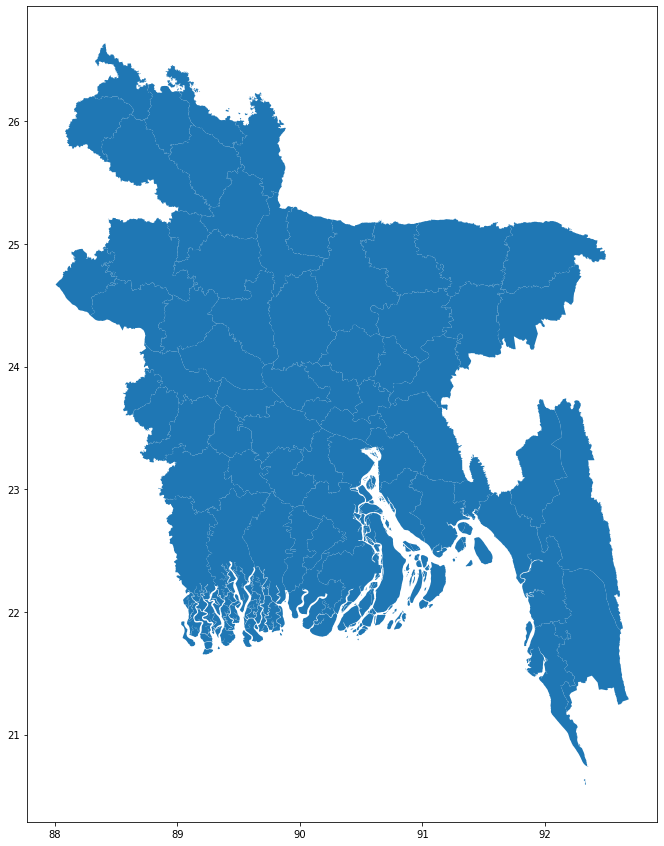

In [65]:
df_geo.plot(figsize=(15,15))

In [50]:
df_geo_selected = df_geo.loc[['DHAKA', 'GAZIPUR','NOAKHALI', 'RAJSHAHI','RANGPUR'] , ['Division_N', 'geometry'] ]
df_geo_selected.head()

,Division_N,geometry
District_N,,
DHAKA,DHAKA,"POLYGON ((10020679.586 2758813.245, 10020694.4..."
GAZIPUR,DHAKA,"POLYGON ((10068500.198 2794764.857, 10069154.7..."
NOAKHALI,CHITTAGONG,"MULTIPOLYGON (((10136746.130 2515222.798, 1013..."
RAJSHAHI,RAJSHAHI,"POLYGON ((9852179.943 2841217.146, 9852394.966..."
RANGPUR,RANGPUR,"POLYGON ((9919911.142 2994990.808, 9920510.506..."


In [53]:
df_geo.to_file("districts.geojson", driver='GeoJSON')

In [66]:
districts = pd.Series(df_geo.index)

In [67]:
districts.to_clipboard()